In [1]:
import os
import ssl
import time
import urllib.request

from urllib import parse
from tqdm.notebook import tqdm

from selenium import webdriver
from selenium.webdriver import ActionChains
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.service import Service as ChromeService
from webdriver_manager.chrome import ChromeDriverManager #!pip install webdriver-manager

ssl._create_default_https_context = ssl._create_unverified_context

In [2]:
def createDirectory(directory):
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)
    except OSError:
        print("Error: Failed to create the directory.")

In [3]:
def crawling_img(name,num):
    
    url = "https://www.google.co.kr/imghp?hl=ko&tab=wi&authuser=0&ogbl"
    driver = webdriver.Chrome(service=ChromeService(ChromeDriverManager().install()))
    driver.get(url)
    action = ActionChains(driver)
    #time.sleep(1)
    #driver.maximize_window()
    
    elem = driver.find_element(By.NAME,"q")
    elem.send_keys(name)
    elem.send_keys(Keys.RETURN)

    SCROLL_PAUSE_TIME = 1
    # Get scroll height
    last_height = driver.execute_script("return document.body.scrollHeight")  # 브라우저의 높이를 자바스크립트로 찾음
    while True:
        # Scroll down to bottom
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")  # 브라우저 끝까지 스크롤을 내림
        # Wait to load page
        time.sleep(SCROLL_PAUSE_TIME)
        # Calculate new scroll height and compare with last scroll height
        new_height = driver.execute_script("return document.body.scrollHeight")
        if new_height == last_height:
            try:
                driver.find_element(By.CSS_SELECTOR,".mye4qd").click()
            except:
                break
                
        last_height = new_height
    imgs = driver.find_elements(By.CSS_SELECTOR,".rg_i.Q4LuWd")
        
    dir = "./imgs_data/" + name
    createDirectory(dir) #폴더 생성
    
    count = 0
    for img in imgs:
        try:
            img.click()
            time.sleep(0.5)
            imgUrl = driver.find_element(By.XPATH,
                '//*[@id="Sva75c"]/div[2]/div[2]/div[2]/div[2]/c-wiz/div/div/div/div[3]/div[1]/a/img[1]').get_attribute(
                "src")  
            
            opener = urllib.request.build_opener()
            opener.addheaders = [
            ('User-Agent',
             'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1941.0 Safari/537.36')
            ]
            urllib.request.install_opener(opener)
            
            path = dir + "/"
            urllib.request.urlretrieve(imgUrl, path + name + str(count+1) + ".jpg")
            count = count + 1
            if count >= num:
                break
        except Exception as e:
            #print('e : ', e)
            pass
    driver.close()

e :  Message: element click intercepted: Element  is not clickable at point (151, 644). Other element would receive the click: <div jsname="r5xl4" class="islrc" role="list" style="width: 551px;">...</div>
  (Session info: chrome=117.0.5938.150)
Stacktrace:
	GetHandleVerifier [0x0116CFE3+45267]
	(No symbol) [0x010F9741]
	(No symbol) [0x00FEBE1D]
	(No symbol) [0x01023B81]
	(No symbol) [0x0102267F]
	(No symbol) [0x01020C6B]
	(No symbol) [0x01020005]
	(No symbol) [0x0101855A]
	(No symbol) [0x0103B03C]
	(No symbol) [0x01017F96]
	(No symbol) [0x0103B2B4]
	(No symbol) [0x0104DDDA]
	(No symbol) [0x0103AE36]
	(No symbol) [0x0101674E]
	(No symbol) [0x010178ED]
	GetHandleVerifier [0x01425659+2897737]
	GetHandleVerifier [0x0146E78B+3197051]
	GetHandleVerifier [0x01468571+3171937]
	GetHandleVerifier [0x011F5E40+606000]
	(No symbol) [0x0110338C]
	(No symbol) [0x010FF508]
	(No symbol) [0x010FF62F]
	(No symbol) [0x010F1D27]
	BaseThreadInitThunk [0x75D8FCC9+25]
	RtlGetAppContainerNamedObjectPath [0x779
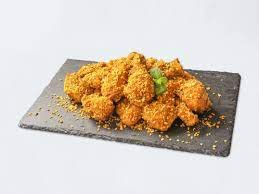

e :  Message: element click intercepted: Element  is not clickable at point (427, 641). Other element would receive the click: <div jsname="r5xl4" class="islrc" role="list" style="width: 551px;">...</div>
  (Session info: chrome=117.0.5938.150)
Stacktrace:
	GetHandleVerifier [0x0116CFE3+45267]
	(No symbol) [0x010F9741]
	(No symbol) [0x00FEBE1D]
	(No symbol) [0x01023B81]
	(No symbol) [0x0102267F]
	(No symbol) [0x01020C6B]
	(No symbol) [0x01020005]
	(No symbol) [0x0101855A]
	(No symbol) [0x0103B03C]
	(No symbol) [0x01017F96]
	(No symbol) [0x0103B2B4]
	(No symbol) [0x0104DDDA]
	(No symbol) [0x0103AE36]
	(No symbol) [0x0101674E]
	(No symbol) [0x010178ED]
	GetHandleVerifier [0x01425659+2897737]
	GetHandleVerifier [0x0146E78B+3197051]
	GetHandleVerifier [0x01468571+3171937]
	GetHandleVerifier [0x011F5E40+606000]
	(No symbol) [0x0110338C]
	(No symbol) [0x010FF508]
	(No symbol) [0x010FF62F]
	(No symbol) [0x010F1D27]
	BaseThreadInitThunk [0x75D8FCC9+25]
	RtlGetAppContainerNamedObjectPath [0x779
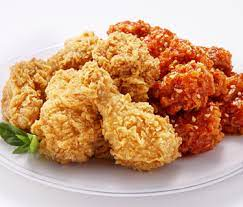

e :  Message: element click intercepted: Element <img data-ils="4" jsaction="rcuQ6b:trigger.M8vzZb;" class="rg_i Q4LuWd" jsname="Q4LuWd" width="225" height="225" alt="크리미어니언치킨 : 강정이기가막혀" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTS18ILTpubAlaD6sh2k_ZKQF7_6t2rs4oL8w&amp;usqp=CAU"> is not clickable at point (407, 637). Other element would receive the click: <div jsname="r5xl4" class="islrc" role="list" style="width: 551px;">...</div>
  (Session info: chrome=117.0.5938.150)
Stacktrace:
	GetHandleVerifier [0x0116CFE3+45267]
	(No symbol) [0x010F9741]
	(No symbol) [0x00FEBE1D]
	(No symbol) [0x01023B81]
	(No symbol) [0x0102267F]
	(No symbol) [0x01020C6B]
	(No symbol) [0x01020005]
	(No symbol) [0x0101855A]
	(No symbol) [0x0103B03C]
	(No symbol) [0x01017F96]
	(No symbol) [0x0103B2B4]
	(No symbol) [0x0104DDDA]
	(No symbol) [0x0103AE36]
	(No symbol) [0x0101674E]
	(No symbol) [0x010178ED]
	GetHandleVerifier [0x01425659+2897737]
	GetHandleVerifier [0x0146E78B+3197051]
	GetHandleVer

e :  Message: element click intercepted: Element <img data-ils="4" jsaction="rcuQ6b:trigger.M8vzZb;" class="rg_i Q4LuWd" jsname="Q4LuWd" width="207" height="233" alt="3만원 치킨` 꺼내더니 결국...잇단 치킨값 인상에 소비자 '부글'" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQuW_wwSGFZ6htkj08g0tQ5EKQyhSdufsNy8w&amp;usqp=CAU"> is not clickable at point (123, 642). Other element would receive the click: <div jsname="r5xl4" class="islrc" role="list" style="width: 551px;">...</div>
  (Session info: chrome=117.0.5938.150)
Stacktrace:
	GetHandleVerifier [0x0116CFE3+45267]
	(No symbol) [0x010F9741]
	(No symbol) [0x00FEBE1D]
	(No symbol) [0x01023B81]
	(No symbol) [0x0102267F]
	(No symbol) [0x01020C6B]
	(No symbol) [0x01020005]
	(No symbol) [0x0101855A]
	(No symbol) [0x0103B03C]
	(No symbol) [0x01017F96]
	(No symbol) [0x0103B2B4]
	(No symbol) [0x0104DDDA]
	(No symbol) [0x0103AE36]
	(No symbol) [0x0101674E]
	(No symbol) [0x010178ED]
	GetHandleVerifier [0x01425659+2897737]
	GetHandleVerifier [0x0146E78B+319
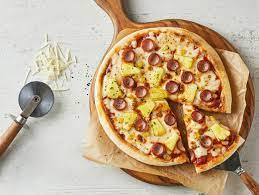

e :  Message: element click intercepted: Element  is not clickable at point (436, 642). Other element would receive the click: <div jsname="r5xl4" class="islrc" role="list" style="width: 551px;">...</div>
  (Session info: chrome=117.0.5938.150)
Stacktrace:
	GetHandleVerifier [0x005ECFE3+45267]
	(No symbol) [0x00579741]
	(No symbol) [0x0046BE1D]
	(No symbol) [0x004A3B81]
	(No symbol) [0x004A267F]
	(No symbol) [0x004A0C6B]
	(No symbol) [0x004A0005]
	(No symbol) [0x0049855A]
	(No symbol) [0x004BB03C]
	(No symbol) [0x00497F96]
	(No symbol) [0x004BB2B4]
	(No symbol) [0x004CDDDA]
	(No symbol) [0x004BAE36]
	(No symbol) [0x0049674E]
	(No symbol) [0x004978ED]
	GetHandleVerifier [0x008A5659+2897737]
	GetHandleVerifier [0x008EE78B+3197051]
	GetHandleVerifier [0x008E8571+3171937]
	GetHandleVerifier [0x00675E40+606000]
	(No symbol) [0x0058338C]
	(No symbol) [0x0057F508]
	(No symbol) [0x0057F62F]
	(No symbol) [0x00571D27]
	BaseThreadInitThunk [0x75D8FCC9+25]
	RtlGetAppContainerNamedObjectPath [0x779
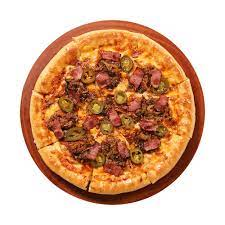

e :  Message: element click intercepted: Element <img data-ils="4" jsaction="rcuQ6b:trigger.M8vzZb;" class="rg_i Q4LuWd" jsname="Q4LuWd" width="241" height="201" alt="피자마루 메뉴추천 포테이토피자 : 네이버 블로그" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ53rLIhH3GokJX_zfQEP3noUemVgOa9Usjgg&amp;usqp=CAU"> is not clickable at point (403, 642). Other element would receive the click: <div jsname="r5xl4" class="islrc" role="list" style="width: 551px;">...</div>
  (Session info: chrome=117.0.5938.150)
Stacktrace:
	GetHandleVerifier [0x005ECFE3+45267]
	(No symbol) [0x00579741]
	(No symbol) [0x0046BE1D]
	(No symbol) [0x004A3B81]
	(No symbol) [0x004A267F]
	(No symbol) [0x004A0C6B]
	(No symbol) [0x004A0005]
	(No symbol) [0x0049855A]
	(No symbol) [0x004BB03C]
	(No symbol) [0x00497F96]
	(No symbol) [0x004BB2B4]
	(No symbol) [0x004CDDDA]
	(No symbol) [0x004BAE36]
	(No symbol) [0x0049674E]
	(No symbol) [0x004978ED]
	GetHandleVerifier [0x008A5659+2897737]
	GetHandleVerifier [0x008EE78B+3197051]
	GetH

e :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="Sva75c"]/div[2]/div[2]/div[2]/div[2]/c-wiz/div/div/div/div[3]/div[1]/a/img[1]"}
  (Session info: chrome=117.0.5938.150); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x005ECFE3+45267]
	(No symbol) [0x00579741]
	(No symbol) [0x0046BE1D]
	(No symbol) [0x0049ED30]
	(No symbol) [0x0049F1FB]
	(No symbol) [0x004CF772]
	(No symbol) [0x004BB084]
	(No symbol) [0x004CDDDA]
	(No symbol) [0x004BAE36]
	(No symbol) [0x0049674E]
	(No symbol) [0x004978ED]
	GetHandleVerifier [0x008A5659+2897737]
	GetHandleVerifier [0x008EE78B+3197051]
	GetHandleVerifier [0x008E8571+3171937]
	GetHandleVerifier [0x00675E40+606000]
	(No symbol) [0x0058338C]
	(No symbol) [0x0057F508]
	(No symbol) [0x0057F62F]
	(No symbol) [0x00571D27]
	BaseThreadInitThunk [0x75D8FCC9+25]
	RtlGetAppContainerNamedObje
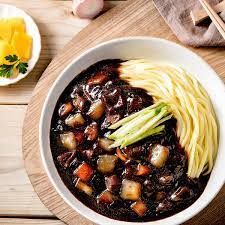

e :  Message: element click intercepted: Element  is not clickable at point (129, 643). Other element would receive the click: <div jsname="r5xl4" class="islrc" role="list" style="width: 551px;">...</div>
  (Session info: chrome=117.0.5938.150)
Stacktrace:
	GetHandleVerifier [0x00A5CFE3+45267]
	(No symbol) [0x009E9741]
	(No symbol) [0x008DBE1D]
	(No symbol) [0x00913B81]
	(No symbol) [0x0091267F]
	(No symbol) [0x00910C6B]
	(No symbol) [0x00910005]
	(No symbol) [0x0090855A]
	(No symbol) [0x0092B03C]
	(No symbol) [0x00907F96]
	(No symbol) [0x0092B2B4]
	(No symbol) [0x0093DDDA]
	(No symbol) [0x0092AE36]
	(No symbol) [0x0090674E]
	(No symbol) [0x009078ED]
	GetHandleVerifier [0x00D15659+2897737]
	GetHandleVerifier [0x00D5E78B+3197051]
	GetHandleVerifier [0x00D58571+3171937]
	GetHandleVerifier [0x00AE5E40+606000]
	(No symbol) [0x009F338C]
	(No symbol) [0x009EF508]
	(No symbol) [0x009EF62F]
	(No symbol) [0x009E1D27]
	BaseThreadInitThunk [0x75D8FCC9+25]
	RtlGetAppContainerNamedObjectPath [0x779
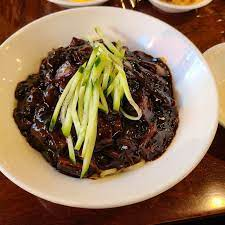

e :  Message: element click intercepted: Element  is not clickable at point (158, 642). Other element would receive the click: <div jsname="r5xl4" class="islrc" role="list" style="width: 551px;">...</div>
  (Session info: chrome=117.0.5938.150)
Stacktrace:
	GetHandleVerifier [0x00A5CFE3+45267]
	(No symbol) [0x009E9741]
	(No symbol) [0x008DBE1D]
	(No symbol) [0x00913B81]
	(No symbol) [0x0091267F]
	(No symbol) [0x00910C6B]
	(No symbol) [0x00910005]
	(No symbol) [0x0090855A]
	(No symbol) [0x0092B03C]
	(No symbol) [0x00907F96]
	(No symbol) [0x0092B2B4]
	(No symbol) [0x0093DDDA]
	(No symbol) [0x0092AE36]
	(No symbol) [0x0090674E]
	(No symbol) [0x009078ED]
	GetHandleVerifier [0x00D15659+2897737]
	GetHandleVerifier [0x00D5E78B+3197051]
	GetHandleVerifier [0x00D58571+3171937]
	GetHandleVerifier [0x00AE5E40+606000]
	(No symbol) [0x009F338C]
	(No symbol) [0x009EF508]
	(No symbol) [0x009EF62F]
	(No symbol) [0x009E1D27]
	BaseThreadInitThunk [0x75D8FCC9+25]
	RtlGetAppContainerNamedObjectPath [0x779
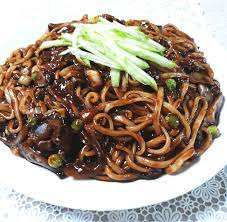

e :  Message: element click intercepted: Element <img data-ils="4" jsaction="rcuQ6b:trigger.M8vzZb;" class="rg_i Q4LuWd" jsname="Q4LuWd" width="186" height="186" alt="더본코리아 [홍콩반점] 짜장면 3900원 프로모션 진행 (2/22~23) | 더본코리아" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRv5S3fnwOn8vGQ2kBwIbsuHqYXx1TC8jPNqg&amp;usqp=CAU"> is not clickable at point (434, 644). Other element would receive the click: <div jsname="r5xl4" class="islrc" role="list" style="width: 551px;">...</div>
  (Session info: chrome=117.0.5938.150)
Stacktrace:
	GetHandleVerifier [0x00A5CFE3+45267]
	(No symbol) [0x009E9741]
	(No symbol) [0x008DBE1D]
	(No symbol) [0x00913B81]
	(No symbol) [0x0091267F]
	(No symbol) [0x00910C6B]
	(No symbol) [0x00910005]
	(No symbol) [0x0090855A]
	(No symbol) [0x0092B03C]
	(No symbol) [0x00907F96]
	(No symbol) [0x0092B2B4]
	(No symbol) [0x0093DDDA]
	(No symbol) [0x0092AE36]
	(No symbol) [0x0090674E]
	(No symbol) [0x009078ED]
	GetHandleVerifier [0x00D15659+2897737]
	GetHandleVerifier [0x0

e :  Message: element click intercepted: Element <img data-ils="4" jsaction="rcuQ6b:trigger.M8vzZb;" class="rg_i Q4LuWd" jsname="Q4LuWd" width="255" height="192" alt="도쿄 교민들에게 물었습니다】도쿄 짜장면 총선거! | tsunagu Japan 츠나구재팬" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSSoMmLQYmoVOYvh9pbYcHw-REK5P3C29tQ2g&amp;usqp=CAU"> is not clickable at point (423, 641). Other element would receive the click: <div jsname="r5xl4" class="islrc" role="list" style="width: 551px;">...</div>
  (Session info: chrome=117.0.5938.150)
Stacktrace:
	GetHandleVerifier [0x00A5CFE3+45267]
	(No symbol) [0x009E9741]
	(No symbol) [0x008DBE1D]
	(No symbol) [0x00913B81]
	(No symbol) [0x0091267F]
	(No symbol) [0x00910C6B]
	(No symbol) [0x00910005]
	(No symbol) [0x0090855A]
	(No symbol) [0x0092B03C]
	(No symbol) [0x00907F96]
	(No symbol) [0x0092B2B4]
	(No symbol) [0x0093DDDA]
	(No symbol) [0x0092AE36]
	(No symbol) [0x0090674E]
	(No symbol) [0x009078ED]
	GetHandleVerifier [0x00D15659+2897737]
	GetHandleVerifier [0x0
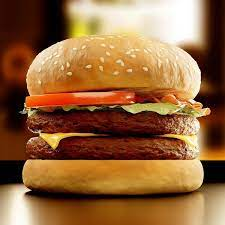

e :  <urlopen error [SSL: UNSAFE_LEGACY_RENEGOTIATION_DISABLED] unsafe legacy renegotiation disabled (_ssl.c:1131)>
e :  Message: element click intercepted: Element <img data-ils="4" jsaction="rcuQ6b:trigger.M8vzZb;" class="rg_i Q4LuWd" jsname="Q4LuWd" width="243" height="189" alt="여적]햄버거병 - 경향신문" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQKtJ9crYyF71F-G3BpvjZSpfgKkGEDRv6iCA&amp;usqp=CAU"> is not clickable at point (141, 644). Other element would receive the click: <div jsname="r5xl4" class="islrc" role="list" style="width: 551px;">...</div>
  (Session info: chrome=117.0.5938.150)
Stacktrace:
	GetHandleVerifier [0x002ECFE3+45267]
	(No symbol) [0x00279741]
	(No symbol) [0x0016BE1D]
	(No symbol) [0x001A3B81]
	(No symbol) [0x001A267F]
	(No symbol) [0x001A0C6B]
	(No symbol) [0x001A0005]
	(No symbol) [0x0019855A]
	(No symbol) [0x001BB03C]
	(No symbol) [0x00197F96]
	(No symbol) [0x001BB2B4]
	(No symbol) [0x001CDDDA]
	(No symbol) [0x001BAE36]
	(No symbol) [0x0019674E]
	(No sy

e :  Message: element click intercepted: Element <img data-ils="4" jsaction="rcuQ6b:trigger.M8vzZb;" class="rg_i Q4LuWd" jsname="Q4LuWd" width="229" height="192" alt="당뇨병 외식 가이드] 맥도날드? 롯데리아? 당뇨 환자도 햄버거 먹을 수 있어요" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRJAfVDHg7qvGpPa-DnR6D3TGCKtrnY-fQTSw&amp;usqp=CAU"> is not clickable at point (412, 644). Other element would receive the click: <div jsname="r5xl4" class="islrc" role="list" style="width: 551px;">...</div>
  (Session info: chrome=117.0.5938.150)
Stacktrace:
	GetHandleVerifier [0x002ECFE3+45267]
	(No symbol) [0x00279741]
	(No symbol) [0x0016BE1D]
	(No symbol) [0x001A3B81]
	(No symbol) [0x001A267F]
	(No symbol) [0x001A0C6B]
	(No symbol) [0x001A0005]
	(No symbol) [0x0019855A]
	(No symbol) [0x001BB03C]
	(No symbol) [0x00197F96]
	(No symbol) [0x001BB2B4]
	(No symbol) [0x001CDDDA]
	(No symbol) [0x001BAE36]
	(No symbol) [0x0019674E]
	(No symbol) [0x001978ED]
	GetHandleVerifier [0x005A5659+2897737]
	GetHandleVerifier [0x005EE7

In [4]:
foods = ["짜장면","짬뽕",'탕수육']

for food in foods:
    crawling_img(food,300)

- 결과 더보기까지 스크롤 했을때 대략 400개 이미지가 추출되는 듯